# Predicting Student Depression

**Submission 1 - Machine Learning Terapan**

Nama: Muhamad Rajwa Athoriq

dataset: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset

## Latar Belakang

Kesehatan mental merupakan aspek penting dalam mendukung keberhasilan akademik dan kehidupan sosial siswa maupun mahasiswa. Dalam beberapa tahun terakhir, terdapat peningkatan signifikan terhadap kasus gangguan mental, khususnya depresi, di kalangan pelajar. Organisasi Kesehatan Dunia (WHO) melaporkan bahwa lebih dari 264 juta orang di dunia menderita depresi, dan sebagian besar kasus dimulai pada usia remaja dan dewasa muda – usia yang identik dengan masa sekolah dan kuliah (World Health Organization, 2020).

Dalam konteks pendidikan tinggi, tekanan akademik, ekspektasi sosial, kesepian, gaya hidup yang tidak seimbang, dan masalah finansial merupakan pemicu utama gangguan psikologis. Menurut sebuah studi oleh American College Health Association (2021), lebih dari 40% mahasiswa di Amerika Serikat melaporkan mengalami gejala depresi dalam satu tahun terakhir. Hal serupa juga terjadi di Indonesia, sebagaimana diungkapkan oleh Kementerian Kesehatan RI, bahwa sekitar 6,1% remaja usia 15–24 tahun mengalami gangguan mental emosional, dan angka ini cenderung meningkat setiap tahunnya (Riskesdas, 2018).

Meningkatnya prevalensi depresi pada pelajar menuntut adanya solusi berbasis teknologi untuk mengidentifikasi risiko secara dini. Namun, pendekatan konvensional seperti konseling tatap muka atau survei manual sering kali bersifat reaktif, tidak efisien, dan sulit menjangkau semua siswa secara merata. Oleh karena itu, diperlukan pendekatan yang lebih sistematis dan prediktif dengan memanfaatkan machine learning dan analitik data.

# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

!pip install opendatasets
import opendatasets as od

# Load Dataset

In [2]:
od.download('https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset', force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhamadrajwaathoriq
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset


100%|██████████| 456k/456k [00:00<00:00, 456MB/s]

In [3]:
df = pd.read_csv('/content/student-depression-dataset/student_depression_dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


# Data Understanding

In [4]:
ListofDecs = []

for i in df.columns:
  ListofDecs.append([i, df[i].dtype, df.shape[0], df[i].isna().sum(), round((df[i].isna().sum()/df.shape[0])*100, 2), df[i].nunique(), df[i].unique()[:5]])

df_decs = pd.DataFrame(ListofDecs, columns=['column', 'type', 'total row', 'null', 'percentage null', 'number of unique value', 'sample unique value'])
df_decs

,column,type,total row,null,percentage null,number of unique value,sample unique value
0,id,int64,27901,0,0.0,27901,"[2, 8, 26, 30, 32]"
1,Gender,object,27901,0,0.0,2,"[Male, Female]"
2,Age,float64,27901,0,0.0,34,"[33.0, 24.0, 31.0, 28.0, 25.0]"
3,City,object,27901,0,0.0,52,"[Visakhapatnam, Bangalore, Srinagar, Varanasi,..."
4,Profession,object,27901,0,0.0,14,"[Student, 'Civil Engineer', Architect, 'UX/UI ..."
5,Academic Pressure,float64,27901,0,0.0,6,"[5.0, 2.0, 3.0, 4.0, 1.0]"
6,Work Pressure,float64,27901,0,0.0,3,"[0.0, 5.0, 2.0]"
7,CGPA,float64,27901,0,0.0,332,"[8.97, 5.9, 7.03, 5.59, 8.13]"
8,Study Satisfaction,float64,27901,0,0.0,6,"[2.0, 5.0, 3.0, 4.0, 1.0]"
9,Job Satisfaction,float64,27901,0,0.0,5,"[0.0, 3.0, 4.0, 2.0, 1.0]"


Kolom `CustomerID` hanya berisi nilai unik untuk setiap pelanggan dan **tidak memberikan kontribusi prediktif**, sehingga kolom ini akan **dihapus dari analisis**.

Selain itu terdapat pula kolom `Financial Stress` yang bertipe data **object** yang seharusnya bertipe data **float**, sehingga perlu dilakukan konversi tipe data sebelum analisis lebih lanjut.

#### Menghapus Kolom yang Tidak diperlukan & Merubah Tipe Data

In [5]:
# menghapus kolom id dan mengubah tipe data pada kolom financial stress
df = df.drop('id', axis=1)
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

In [6]:
# lakukan deskripsi data ulang
ListofDecs = []

for i in df.columns:
  ListofDecs.append([i, df[i].dtype, df.shape[0], df[i].isna().sum(), round((df[i].isna().sum()/df.shape[0])*100, 2), df[i].nunique(), df[i].unique()[:5]])

df_decs = pd.DataFrame(ListofDecs, columns=['column', 'type', 'total row', 'null', 'percentage null', 'number of unique value', 'sample unique value'])
df_decs

,column,type,total row,null,percentage null,number of unique value,sample unique value
0,Gender,object,27901,0,0.00,2,"[Male, Female]"
1,Age,float64,27901,0,0.00,34,"[33.0, 24.0, 31.0, 28.0, 25.0]"
2,City,object,27901,0,0.00,52,"[Visakhapatnam, Bangalore, Srinagar, Varanasi,..."
3,Profession,object,27901,0,0.00,14,"[Student, 'Civil Engineer', Architect, 'UX/UI ..."
4,Academic Pressure,float64,27901,0,0.00,6,"[5.0, 2.0, 3.0, 4.0, 1.0]"
5,Work Pressure,float64,27901,0,0.00,3,"[0.0, 5.0, 2.0]"
6,CGPA,float64,27901,0,0.00,332,"[8.97, 5.9, 7.03, 5.59, 8.13]"
7,Study Satisfaction,float64,27901,0,0.00,6,"[2.0, 5.0, 3.0, 4.0, 1.0]"
8,Job Satisfaction,float64,27901,0,0.00,5,"[0.0, 3.0, 4.0, 2.0, 1.0]"
9,Sleep Duration,object,27901,0,0.00,5,"['5-6 hours', 'Less than 5 hours', '7-8 hours'..."


Setelah dilakukan perubahan tipe data pada kolom `Financial Stress`, ditemukan 3 nilai null pada kolom tersebut. Oleh karena itu, baris yang mengandung nilai null akan dihapus untuk menjaga keaslian data.

# Exploratory Data Analysis

## Univariate Analysis

In [7]:
cat = df.select_dtypes('object').columns
num = df.select_dtypes('number').columns.drop('Depression')

print(f'Kolom dengan tipe Kategori: \n{cat}\n')
print(f'Kolom dengan tipe Numerik: \n{num}')

Kolom dengan tipe Kategori: 
Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

Kolom dengan tipe Numerik: 
Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')


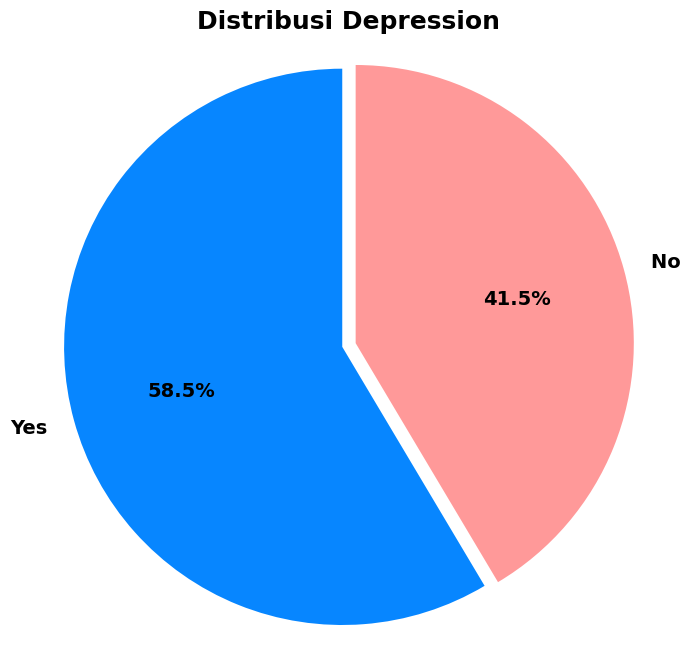

In [8]:
import matplotlib.pyplot as plt

# Set figure
plt.figure(figsize=(8,8))

# Pie plot
plt.pie(
    df['Depression'].value_counts(),
    labels=df['Depression'].value_counts().index.map({0:'No ', 1:'Yes'}),
    autopct='%1.1f%%',
    textprops={'fontsize': 14, 'fontweight': 'bold'},
    colors=['#0786ff', '#ff9999'],
    startangle=90,
    explode=(0.05, 0),
)

# Judul
plt.title('Distribusi Depression', fontsize=18, fontweight='bold')

# Menjaga bentuk pie bulat
plt.axis('equal')

# Tampilkan plot
plt.show()


Distribusi pada data target (Depression) sedikit **imbalance** (tidak seimbang), yang mungkin dapat menyebabkan model cenderung memprediksi kelas mayoritas. Oleh karena itu, untuk mengantisipasi permasalahan ini, akan dilakukan percobaan menggunakan teknik **oversampling** pada **data train** (*setelah proses pembagian data menjadi data latih dan data uji*).

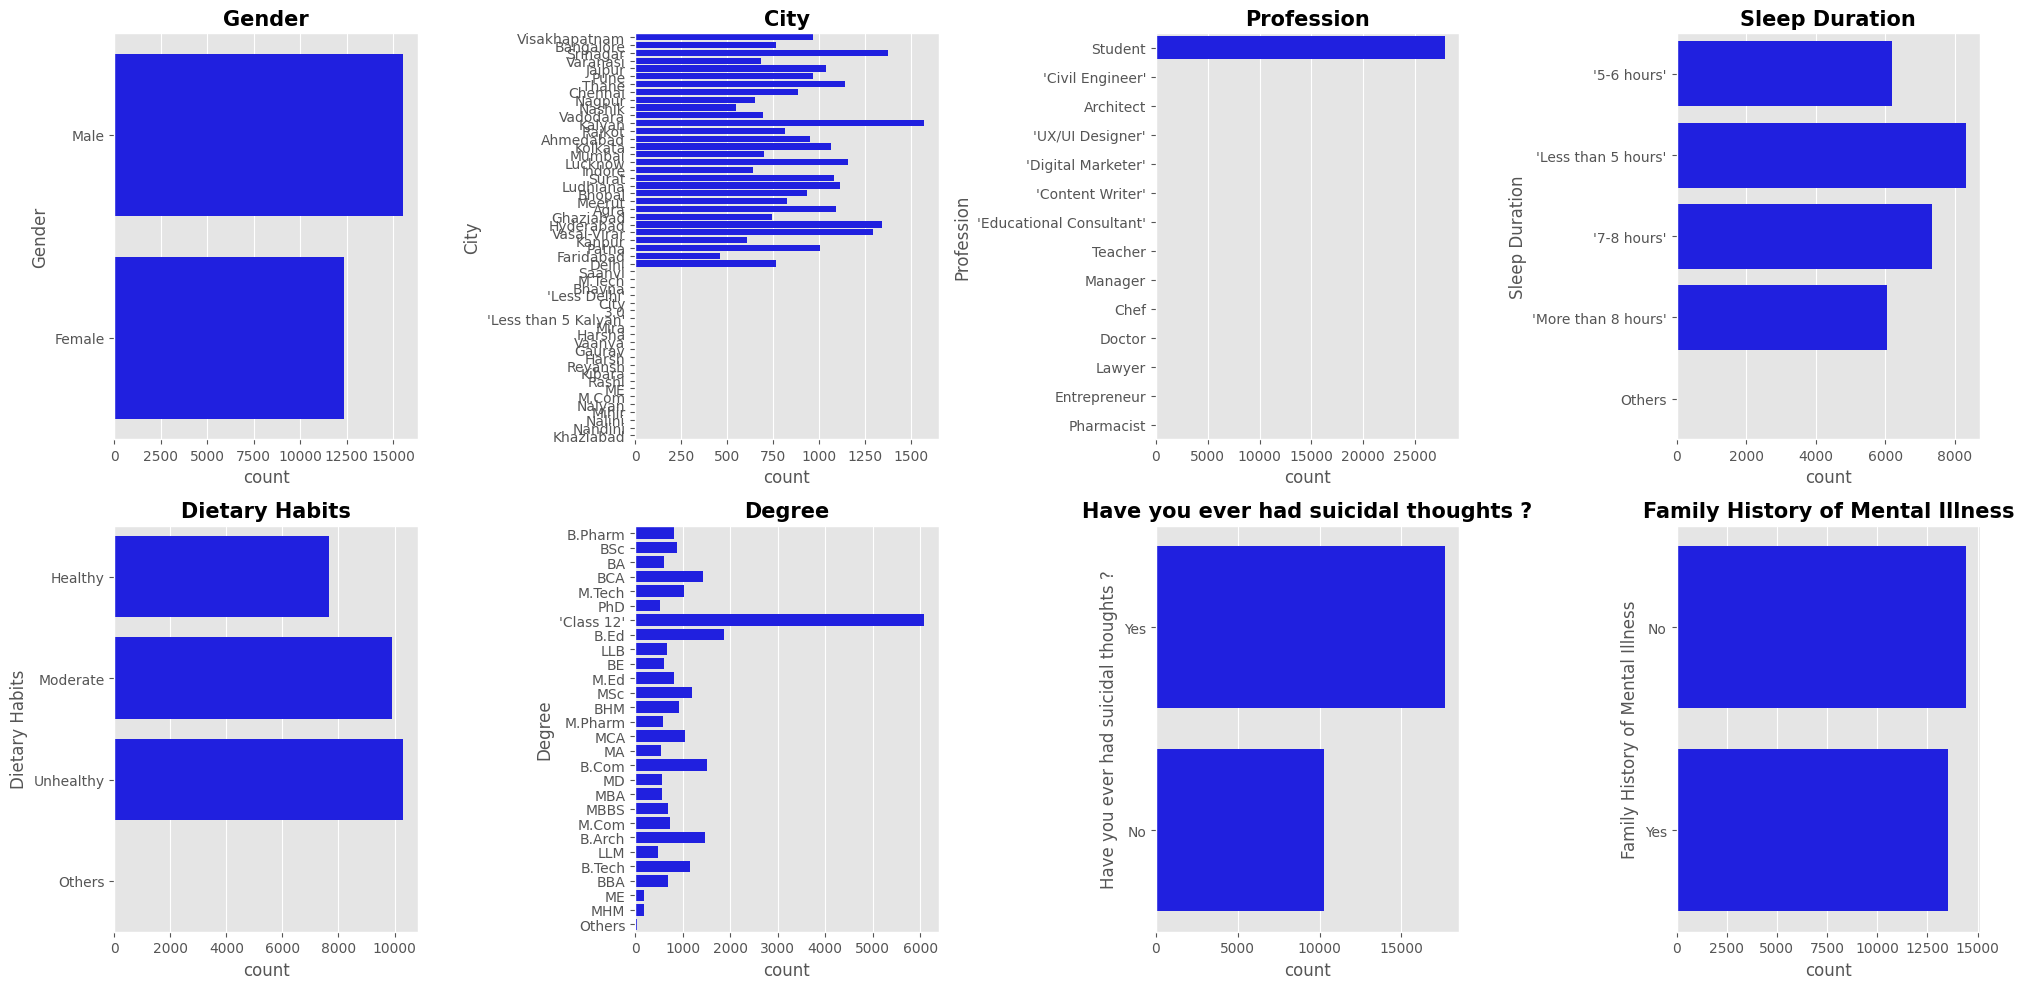

In [9]:
# Melakukan visualisasi countplot terhadap kolom kategori
plt.figure(figsize=(20,10))

plt.style.use('ggplot')

for i, col in enumerate(cat):
  plt.subplot(2, 4, i+1)
  ax = sns.countplot(data=df, y=col, color='blue')
  plt.title(col, fontsize=15, weight='bold', usetex=False)

plt.tight_layout()
plt.show()

Berdasarkan distribusi nilai pada kolom-kolom kategorikal, ditemukan bahwa kolom `City` dan `Profession` memiliki beberapa kategori dengan jumlah data yang sangat sedikit (dominan pada satu kategori saja). Selain itu, kolom City juga memiliki terlalu banyak kategori, yang ***dapat menyebabkan curse of dimensionality***. Oleh karena itu, kedua kolom tersebut akan dihapus dari dataset.

Selain itu, pada kolom `Sleep Duration`, `Dietary Habits`, dan `Degree`, terdapat kategori bernilai "Others" yang tidak merepresentasikan informasi yang jelas serta jumlahnya sangat sedikit. Maka dari itu, baris data yang memiliki nilai "Others" pada fitur-fitur tersebut akan dihapus dari dataset.

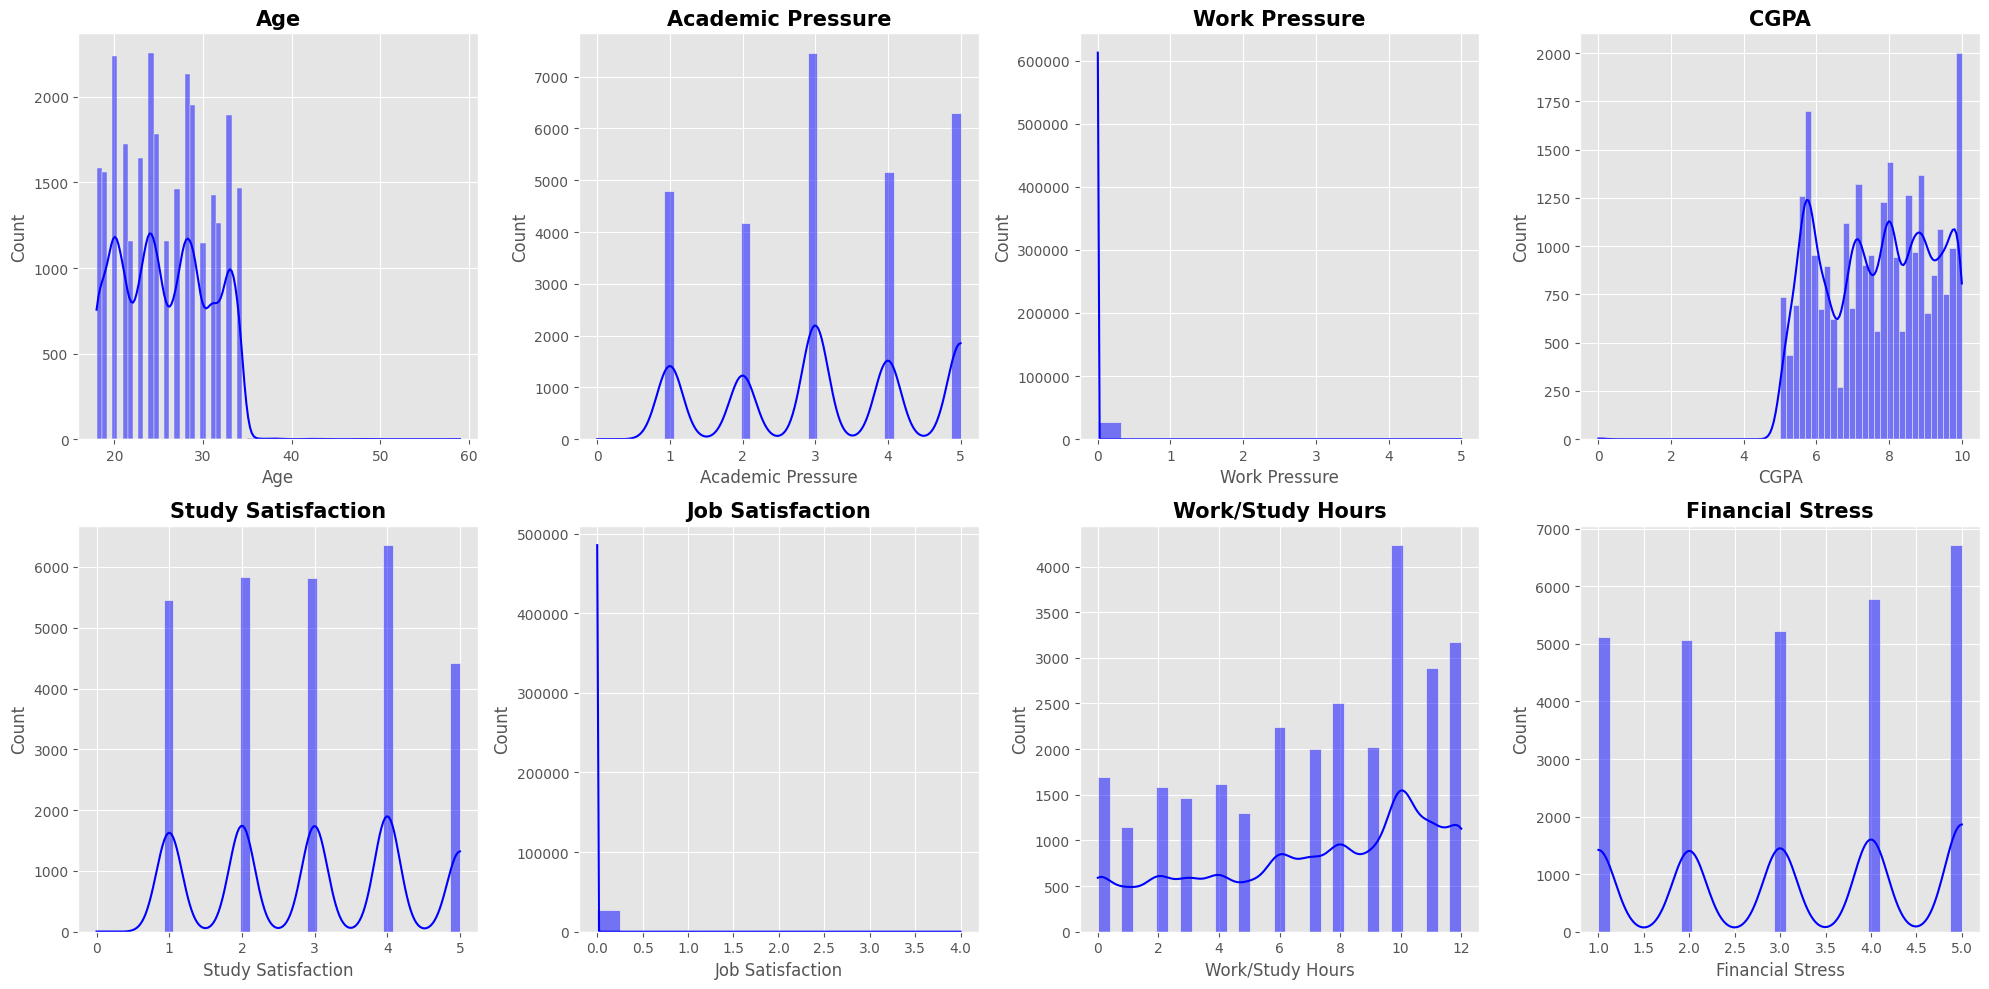

In [10]:
# Melakukan visualisasi histogram terhadap kolom numerik
plt.figure(figsize=(20,10))

plt.style.use('ggplot')

for i, col in enumerate(num):
  plt.subplot(2, 4, i+1)
  sns.histplot(data=df, x=col, color='blue', kde=True)
  plt.title(col, fontsize=15, weight='bold', usetex=False)

plt.tight_layout()
plt.show()

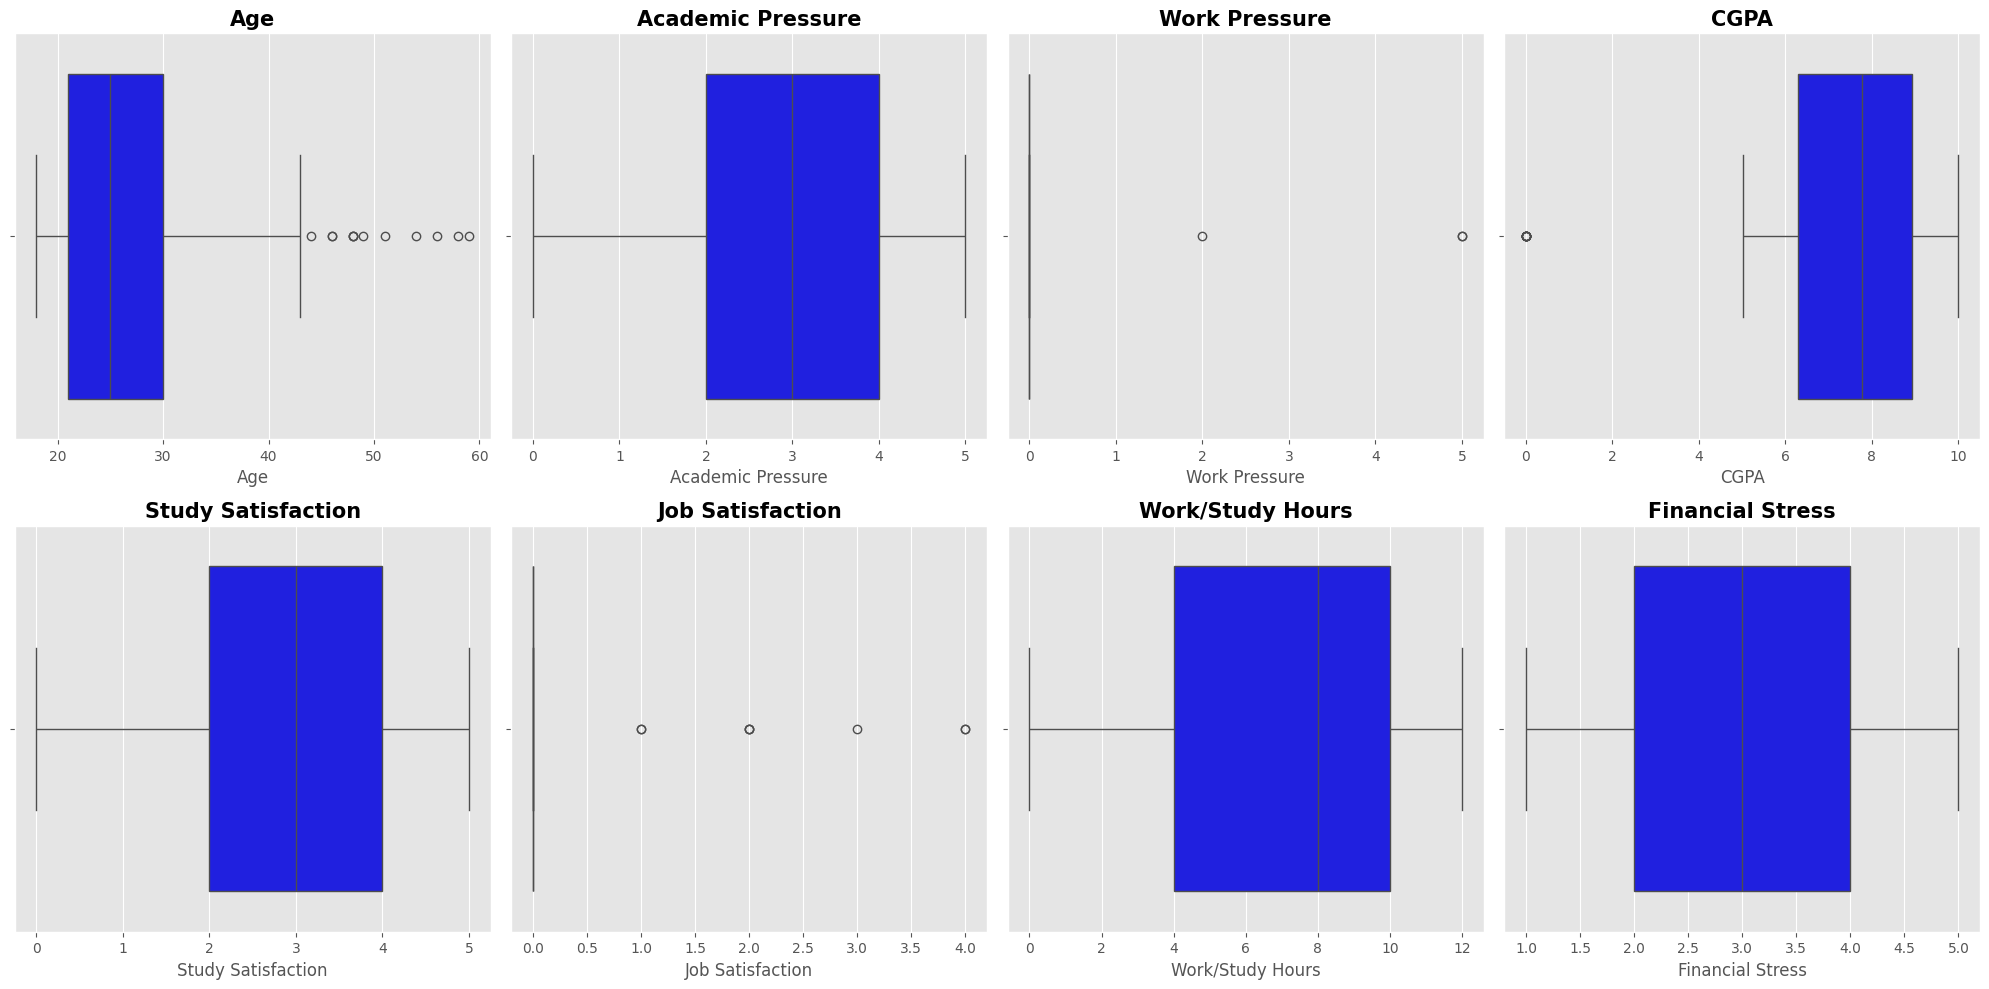

In [11]:
# Melakukan visualisasi boxplot terhadap kolom numerik
plt.figure(figsize=(20,10))

plt.style.use('ggplot')

for i, col in enumerate(num):
  plt.subplot(2, 4, i+1)
  sns.boxplot(data=df, x=col, color='blue')
  plt.title(col, fontsize=15, weight='bold', usetex=False)

plt.tight_layout()
plt.show()

 Kolom `Work Pressure` dan `Job Satisfaction` juga menunjukkan dominasi pada satu nilai tertentu, sehingga tidak memberikan variasi yang signifikan untuk analisis. Oleh karena itu, kedua kolom tersebut akan dihapus dari dataset.  

 Sementara itu, kolom `Age` dan `CGPA` teridentifikasi memiliki nilai outlier yang dapat memengaruhi hasil analisis. Outlier pada kedua kolom tersebut akan dihapus pada tahap praproses selanjutnya.

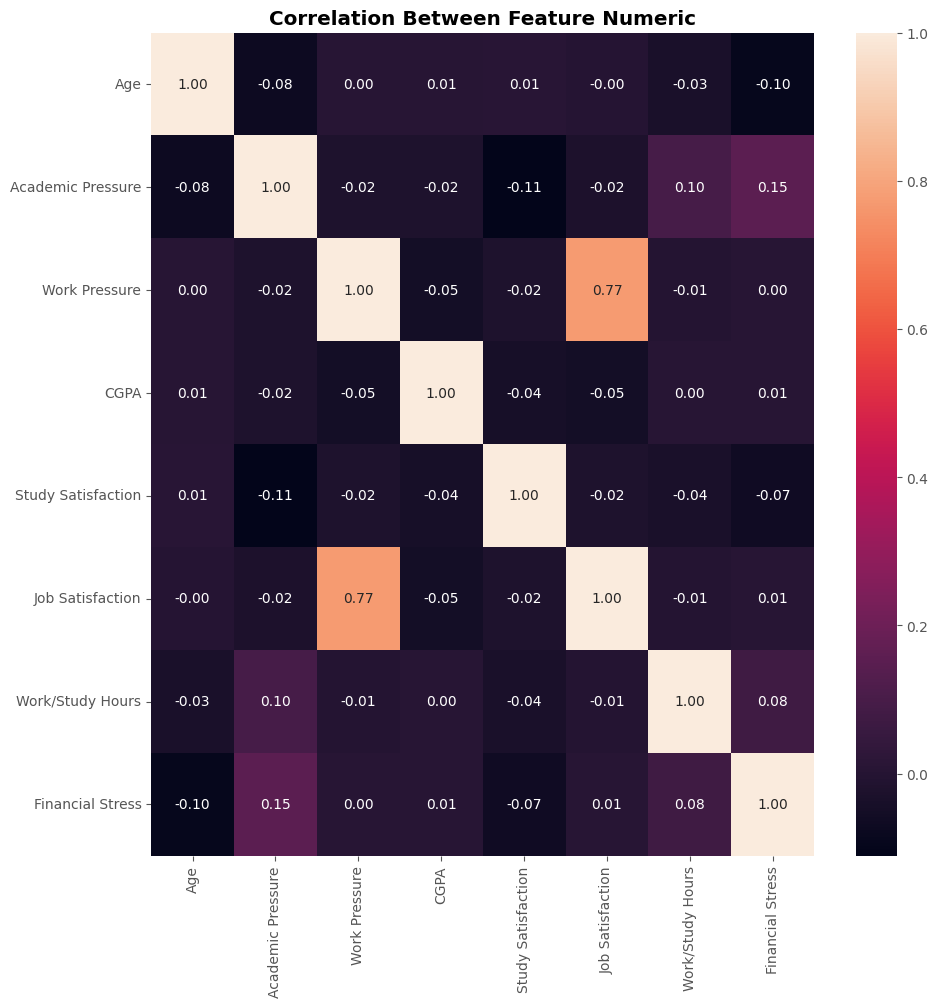

In [12]:
# menampilkan korelasi antara feature yg ada
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(), annot=True, fmt='.2f')
plt.tight_layout()
plt.title('Correlation Between Feature Numeric', weight='bold')
plt.show()

Apabila dilihat berdasarkan korelasi antara feature numerik yang dimiliki, pada dataset ini tidak terdapat feature redundant

In [13]:
# Menghapus kolom & nilai yang tidak diperlukan
df.drop(['City', 'Profession', 'Job Satisfaction', 'Work Pressure'], axis=1, inplace=True)

df = df[~((df['Sleep Duration'] == 'Others') |
        (df['Dietary Habits'] == 'Others') |
        (df['Degree'] == 'Others') |
        (df['Financial Stress'] == 7))]

In [14]:
df.shape

(27836, 13)

## Multivariate Analysis

In [60]:
# membuat function untuk melakukan visualisasi persentase setiap values
def plot_distribution_percentage_category(col, orient):

  def percentage_feature(col):
    df_perce = df.groupby([col, 'Depression']).size().reset_index().rename(columns={0:'Count'})
    df_perce['Percentage'] = ((df_perce['Count']/df_perce.groupby(col)['Count'].transform('sum'))*100).round(2)
    df_perce.sort_values('Percentage', ascending= False, inplace=True)
    return df_perce

  data = percentage_feature(col)

  if orient == 'h':
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(y=col, x='Percentage', hue='Depression', data=data, orient=orient, palette="mako")
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width:.2f}%',
                    xy=(width / 2, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    plt.xlabel('Percentage by Total Person', fontsize=12)

  else:
    plt.figure(figsize=(12, 8))
    ax =sns.barplot(data=data, x=col, y='Percentage', hue='Depression', palette='mako')
    for p in ax.patches:
      height = p.get_height()
      ax.annotate(f'{height:.2f}%',
                  xy=(p.get_x() + p.get_width() / 2, height/2),
                  ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')

    plt.ylabel('Percentage by Total Person', fontsize=12)

  plt.title(f"Percentage of Overall {col} Distribution", fontsize=14, fontweight='bold')
  plt.legend(title='Depression', fontsize=10, title_fontsize=12)
  plt.show()

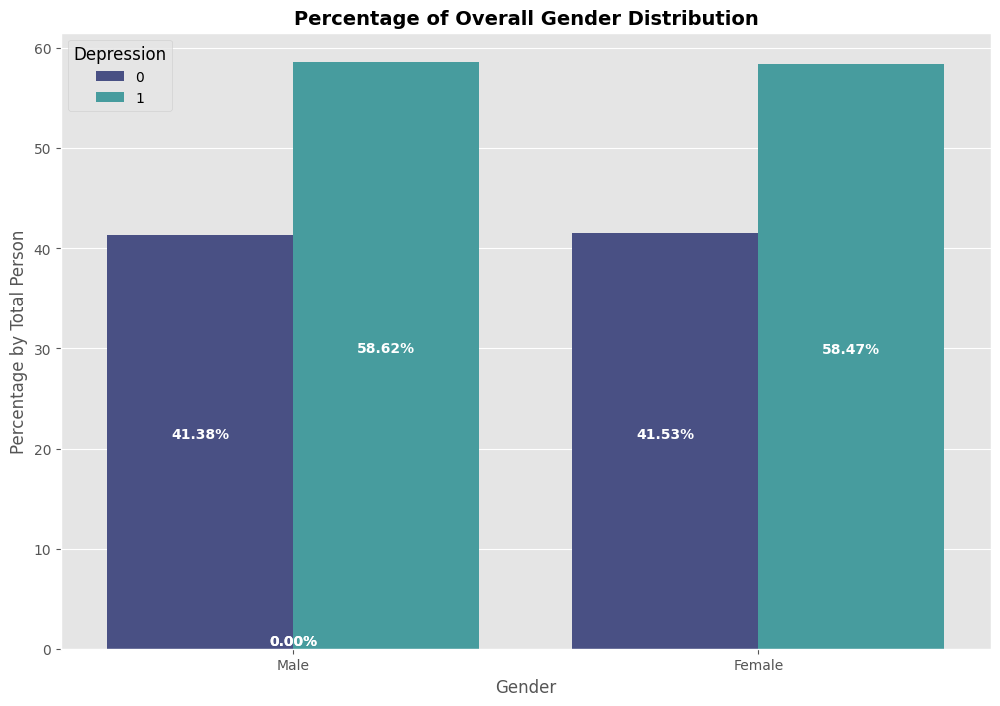

In [61]:
plot_distribution_percentage_category('Gender', 'v')

Berdasarkan kategori **Gender**, tingkat kemungkinan mengalami depresi antara laki-laki dan perempuan menunjukkan persentase yang hampir sama, yaitu ***masing-masing sebesar 58%***.

Hal ini dapat dilihat pada diagram di bawah, yang memperlihatkan distribusi persentase depresi berdasarkan gender.

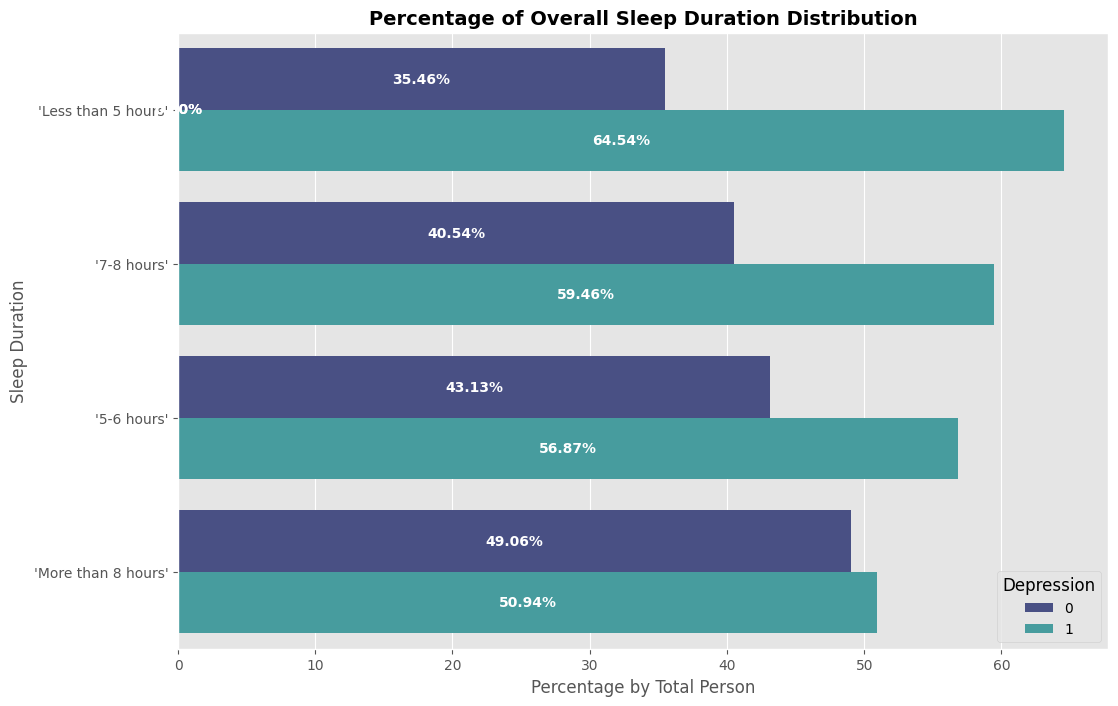

In [62]:
plot_distribution_percentage_category('Sleep Duration', 'h')

Grafik menunjukkan bahwa semakin pendek durasi tidur, semakin tinggi persentase individu yang mengalami depresi, dengan angka tertinggi pada kelompok tidur kurang dari 5 jam (64,54%). Meskipun proporsi depresi menurun seiring bertambahnya durasi tidur, tidur lebih dari 8 jam tidak menunjukkan perbedaan signifikan. Ini menunjukkan bahwa durasi tidur berpengaruh terhadap depresi, namun bukan satu-satunya faktor.

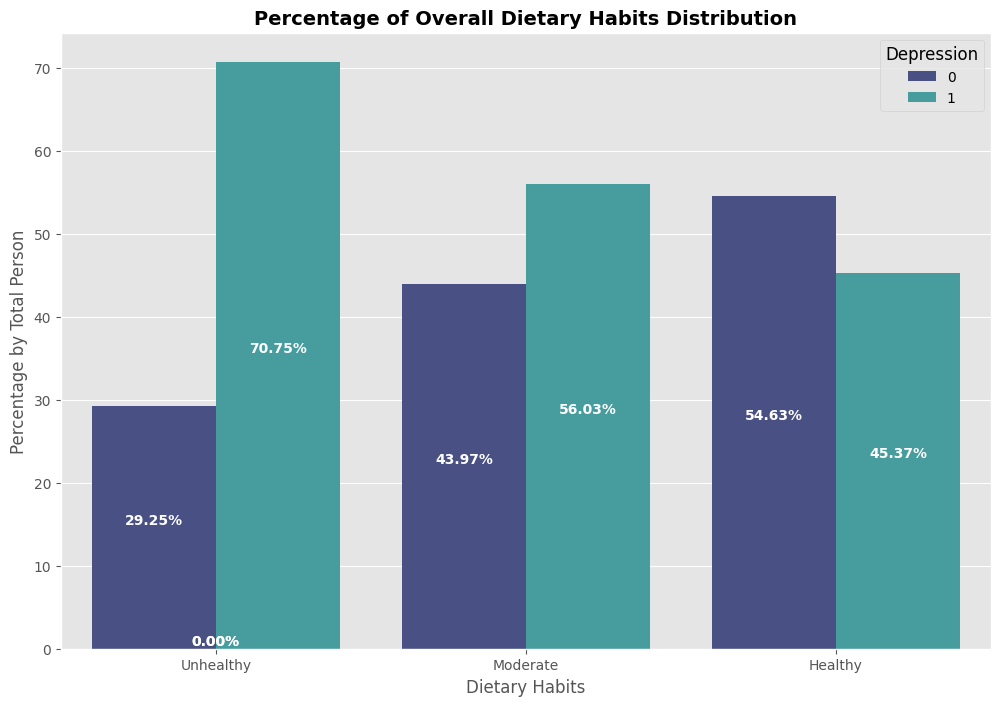

In [63]:
plot_distribution_percentage_category('Dietary Habits', 'v')

Grafik menunjukkan bahwa individu dengan pola makan tidak sehat memiliki persentase depresi tertinggi (70,75%), sedangkan pada pola makan sehat, persentase depresi lebih rendah (45,37%). Hal ini menunjukkan bahwa semakin baik pola makan seseorang, semakin rendah kecenderungan mengalami depresi.

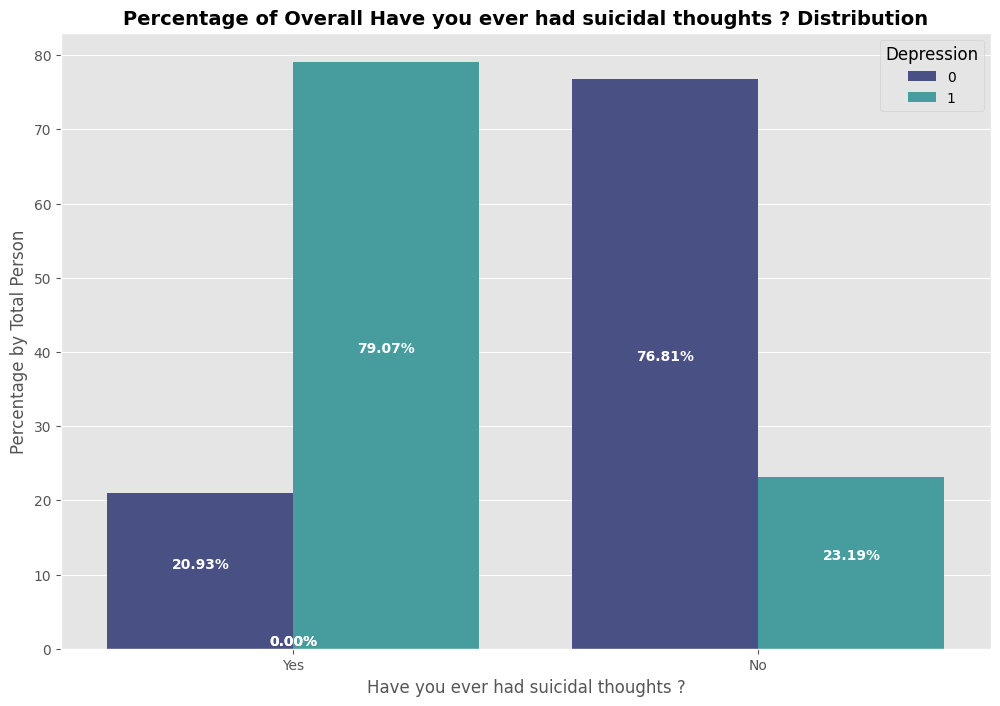

In [64]:
plot_distribution_percentage_category('Have you ever had suicidal thoughts ?', 'v')

Pemikiran untuk bunuh diri merupakan tanda serius gangguan mental, terutama depresi. Data menunjukkan bahwa 79% dari mereka yang pernah memiliki pikiran tersebut mengalami depresi, jauh lebih tinggi dibandingkan 23% pada mereka yang tidak pernah berpikiran demikian. Ini menegaskan kuatnya kaitan antara pikiran bunuh diri dan depresi.

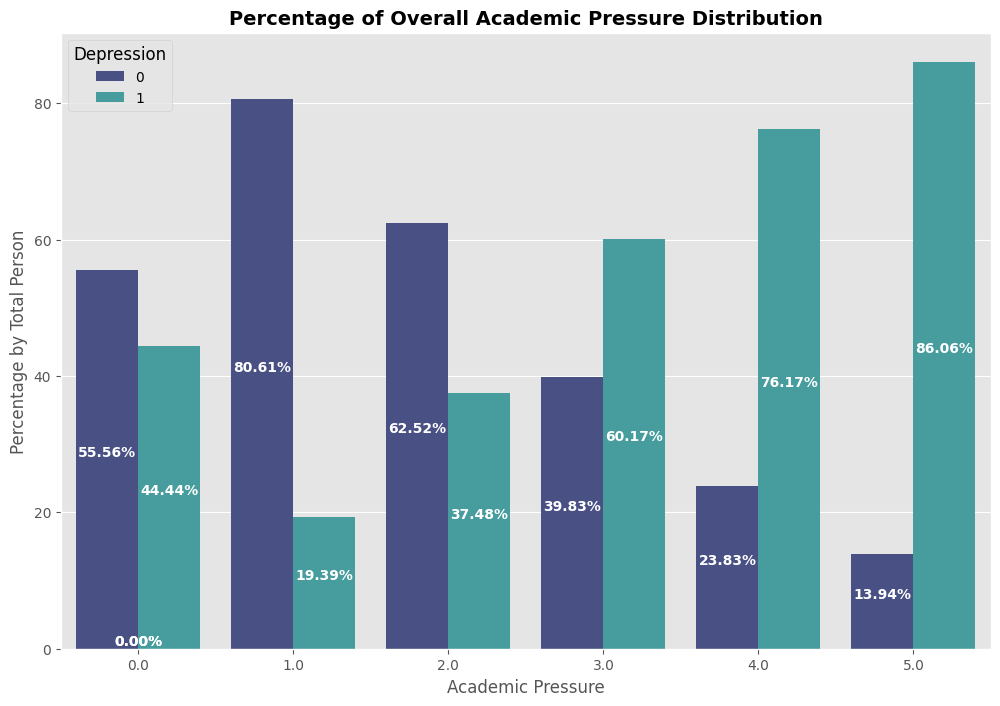

In [65]:
plot_distribution_percentage_category('Academic Pressure', 'v')

Grafik menunjukkan bahwa semakin tinggi tingkat tekanan akademik, semakin besar persentase individu yang mengalami depresi. Pada tingkat tekanan tertinggi (skor 5), sebanyak **86,06%** mengalami depresi, sedangkan pada tingkat tekanan terendah (skor 1), hanya **19,39%** yang mengalami depresi. Hal ini mengindikasikan bahwa tekanan akademik yang tinggi memiliki kaitan kuat dengan meningkatnya risiko depresi.

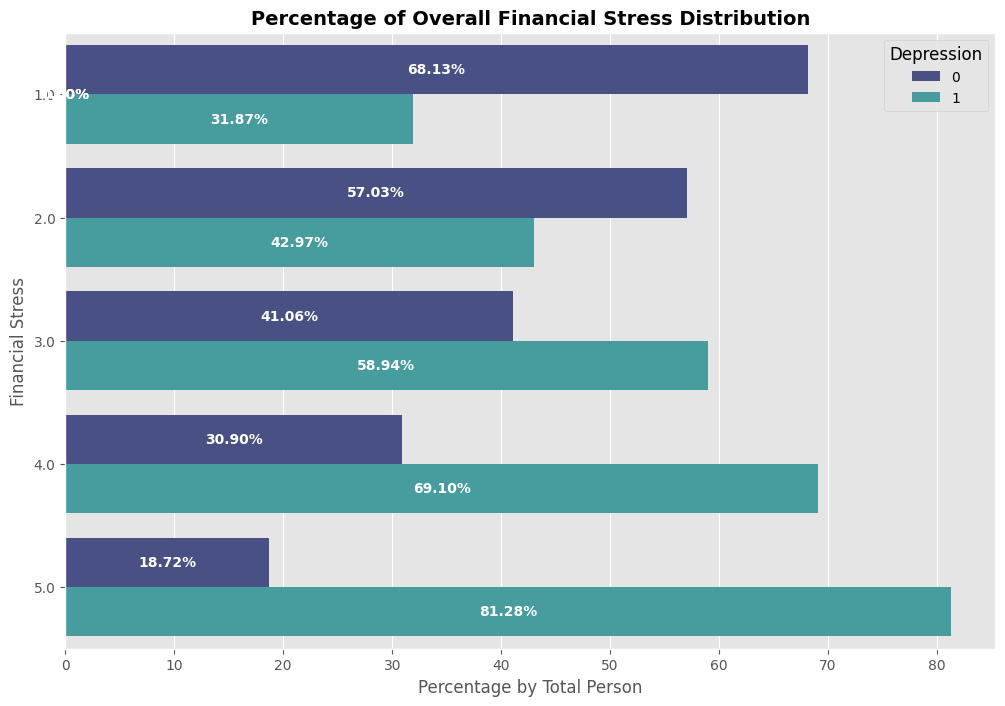

In [66]:
plot_distribution_percentage_category('Financial Stress', 'h')

Diagram ini menunjukkan tren penurunan persentase stres finansial pelajar seiring naiknya kategori (1.0-5.0). Pada kategori tertinggi (1.0), 68,13% pelajar mengalami stres finansial, namun angka ini turun drastis menjadi hanya 18,72% di kategori terendah (5.0). Sebaliknya, persentase pelajar tanpa stres finansial meningkat dari 31,87% (kategori 1.0) menjadi 81,28% (kategori 5.0), menunjukkan bahwa kategori lebih tinggi berkorelasi dengan stabilitas keuangan yang lebih baik. Data "Percentage by Total Customers" tidak tersedia untuk analisis lebih lanjut.

In [53]:
def plot_distribution_numeric(data, col):
  plt.figure(figsize=(10,6))
  sns.histplot(data=data, x=col, hue='Depression', kde=True)

  mean_all = data[col].mean()
  mean_Depression = data[data['Depression'] == 1][col].mean()
  mean_not_Depression = data[data['Depression'] == 0][col].mean()

  plt.axvline(mean_all, color='#28B463', linestyle='dashed', label=f'Rata-rata keseluruhan {mean_all:.2f}')
  plt.axvline(mean_Depression, color='#2E86C1', linestyle='dotted', label=f'Rata-rata Pelajar Depression {mean_Depression:.2f}')
  plt.axvline(mean_not_Depression, color='#FF5733', linestyle='solid', label=f'Rata-rata Pelajar tidak Depression {mean_not_Depression:.2f}')

  plt.text(mean_all, plt.ylim()[1]*0.9, color='#28B463', s=f'Rata-rata keseluruhan\n{mean_all:.2f}', ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
  plt.text(mean_Depression, plt.ylim()[1]*0.8, color='#2E86C1', s=f'Rata-rata Pelajar Depression\n{mean_Depression:.2f}', ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
  plt.text(mean_not_Depression, plt.ylim()[1]*0.7, color='#FF5733', s=f'Rata-rata Pelajar tidak Depression\n{mean_not_Depression:.2f}', ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

  plt.title(f'Distribusi {col} Berdasarkan Status Depression Pelajar', fontsize=14)
  plt.xlabel(f'{col}', fontsize=12)
  plt.ylabel('Total Pelajar', fontsize=12)
  plt.tight_layout()
  plt.show()

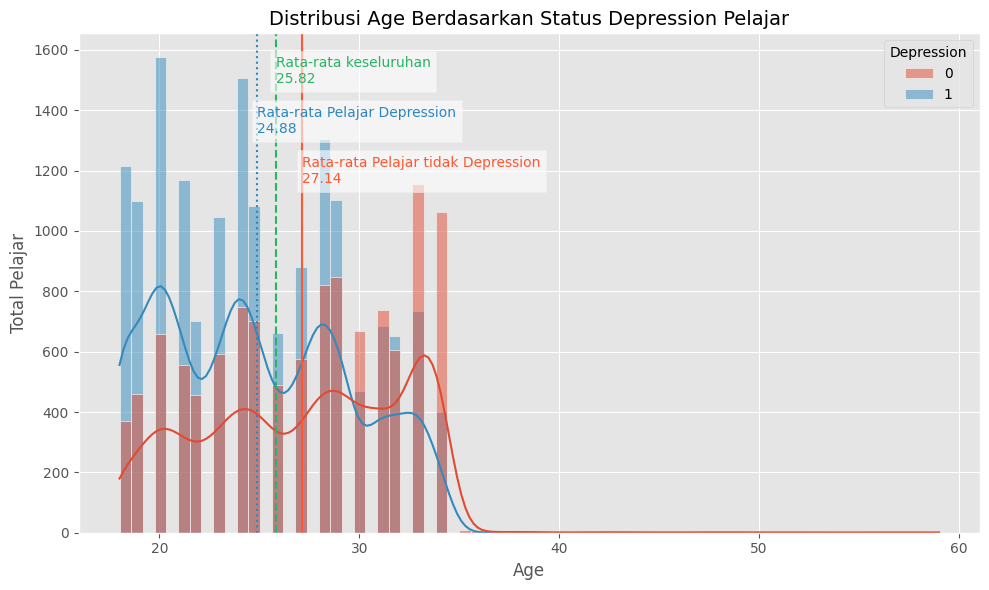

In [54]:
plot_distribution_numeric(df, 'Age')

Grafik menunjukkan bahwa customer dengan status depresi cenderung berusia lebih muda, dengan rata-rata usia 24 tahun, dibandingkan yang tidak depresi dengan rata-rata 27tahun. Hal ini mengindikasikan bahwa depresi lebih banyak dialami oleh kelompok usia muda.

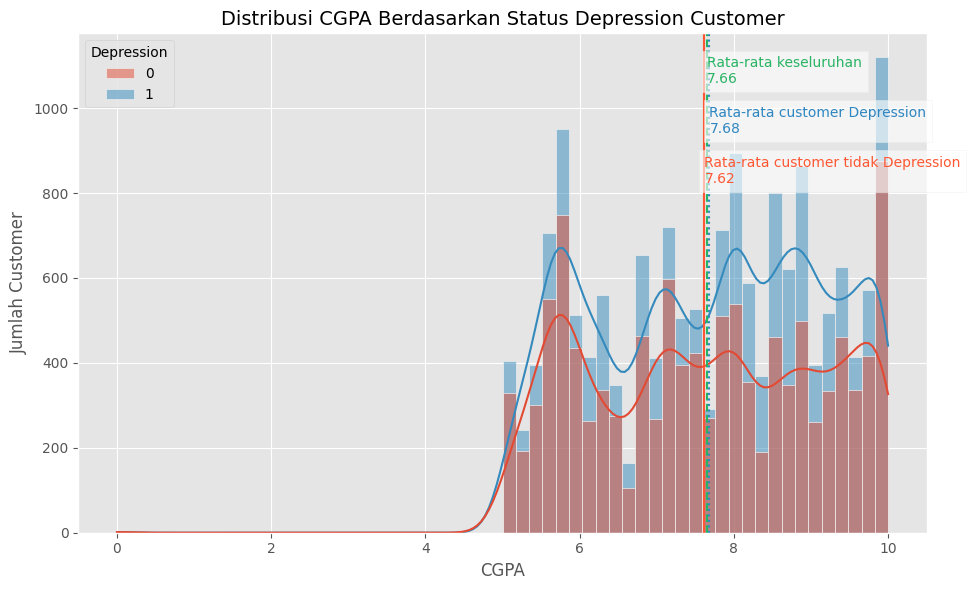

In [24]:
plot_distribution_numeric(df, 'CGPA')

Perbandingan CGPA antara pelajar yang mengalami depresi dan yang tidak menunjukkan tidak adanya perbedaan signifikan, dengan keduanya memiliki rata-rata sekitar 7,6. Hal ini mengindikasikan bahwa meskipun mengalami tekanan psikologis, pelajar dengan depresi tetap mampu menjaga performa akademiknya. Namun, kestabilan nilai ini tidak serta-merta mencerminkan kondisi mental yang sehat, melainkan bisa menjadi tanda bahwa mereka menekan emosinya demi mempertahankan pencapaian.

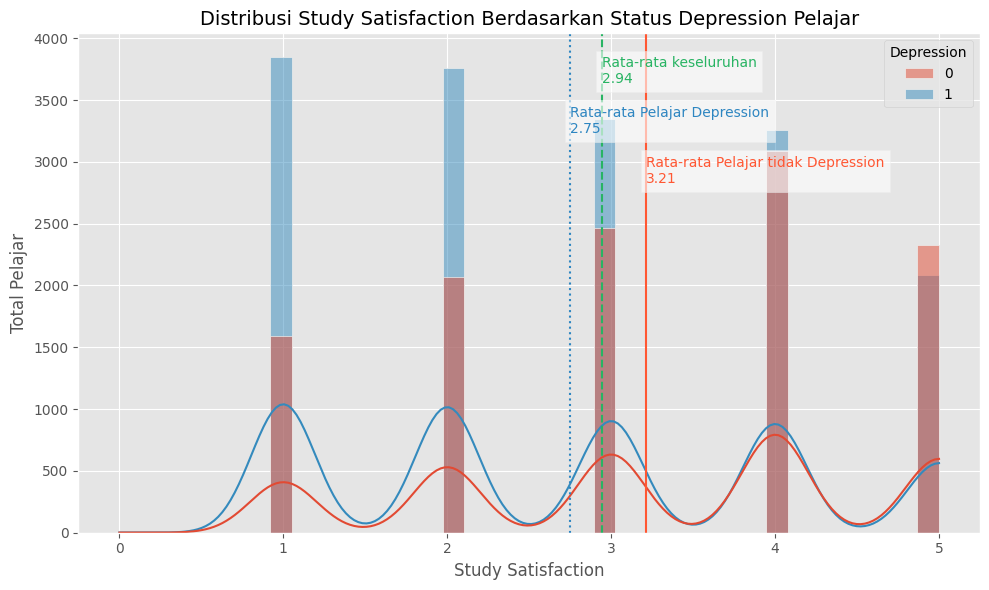

In [55]:
plot_distribution_numeric(df, 'Study Satisfaction')

Rata-rata kepuasan studi secara keseluruhan adalah 2.94, sedangkan pelajar tanpa depresi (0) memiliki rata-rata 2.75 dan pelajar dengan depresi (1) memiliki rata-rata lebih tinggi, yaitu 3.21. Data menunjukkan bahwa pelajar dengan depresi cenderung melaporkan tingkat kepuasan studi yang sedikit lebih tinggi dibandingkan pelajar tanpa depresi.

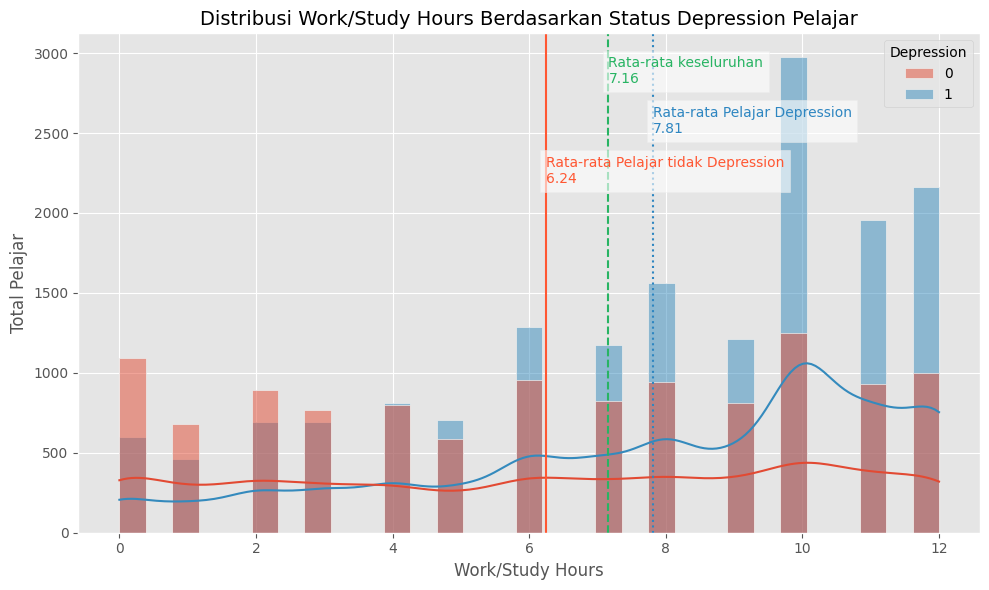

In [56]:
plot_distribution_numeric(df, 'Work/Study Hours')

Grafik menunjukkan bahwa customer dengan depresi memiliki rata-rata jam kerja/belajar lebih tinggi (7,81 jam) dibandingkan yang tidak depresi (6,24 jam). Ini mengindikasikan bahwa semakin banyak jam kerja/belajar, potensi mengalami depresi cenderung meningkat.

# Data Preprocessing

In [27]:
df_prep = df.copy()

Dataset disalin ke dalam variabel `df_prep` untuk melakukan preprocessing, sehingga proses tersebut tidak memengaruhi dataset asli `df`.

## Handle Missing Values

In [28]:
df_prep.isnull().sum()

,0
Gender,0
Age,0
Academic Pressure,0
CGPA,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Degree,0
Have you ever had suicidal thoughts ?,0
Work/Study Hours,0


Pada tahap ini dikarenakan missing value hanya terdapat 3 value pada kolom `Financial Stress` maka kita akan menghapus kolom tersebut. Karena hanya terdapat 3 value pada kolom tersebut maka kita akan menghapus kolom tersebut, dikarenakan agar menjaga keaslian data.

In [29]:
df_prep = df_prep.dropna()

In [30]:
df_prep.isnull().sum()

,0
Gender,0
Age,0
Academic Pressure,0
CGPA,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Degree,0
Have you ever had suicidal thoughts ?,0
Work/Study Hours,0


## Handle Duplicate Values

In [31]:
# Handle Duplicate Value
(f'Jumlah Data Duplikat: {df_prep.duplicated().sum()}')

'Jumlah Data Duplikat: 0'

Saat dilakukan pengecekan, tidak ditemukan data duplikat dalam dataset. Hal ini menunjukkan bahwa setiap entri dalam dataset bersifat unik, sehingga tidak ada data yang berulang yang dapat memengaruhi hasil analisis modeling kedepannya

## Handle Outlier Values

In [32]:
col_selected = ['Age', 'CGPA']

def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[~((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound))]
    return df_cleaned

df_prep = remove_outliers(df_prep, col_selected)


Untuk menangani outlier, kali ini akan dilakukan penghapusan outlier pada kolom `Age` dan `CGPA` menggunakan metode IQR. Metode ini digunakan untuk menghilangkan nilai-nilai yang berada di luar batas bawah dan batas atas yang ditentukan, sehingga data menjadi lebih bersih dan representatif.

## Encoding Values

In [33]:
df_prep.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Encoding Fitur Kategorikal dilakukan 2 bagian, yakni:

1. *Label Encoding* yaitu, mengonversi nilai kategori menjadi angka integer (`0` dan `1`). Variabel yang akan diproses yakni:  <br>
    `Gender`, `Have you ever had suicidal thoughts ?`, `Family History of Mental Illness`
2. *One Hot Ecoding* yaitu mengubah setiap kategori menjadi kolom biner terpisah untuk data tidak terurut. Variabel yang akan diproses yakni: <br>
    `Sleep Duration`, `Dietary Habits`, `Degree`

In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [35]:
# Label Encoding untuk 'Gender'
col_label = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in col_label:
  df_prep[col] = LabelEncoder().fit_transform(df_prep[col])

# One Hot Encoding untuk kolom yang disebutkan
one_hot_columns =  ['Sleep Duration', 'Dietary Habits', 'Degree']
df_prep = pd.get_dummies(df_prep, columns=one_hot_columns, dtype=int)

df_prep.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration_'5-6 hours',Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Degree_'Class 12',Degree_B.Arch,Degree_B.Com,Degree_B.Ed,Degree_B.Pharm,Degree_B.Tech,Degree_BA,Degree_BBA,Degree_BCA,Degree_BE,Degree_BHM,Degree_BSc,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_PhD
0,1,33.0,5.0,8.97,2.0,1,3.0,1.0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,24.0,2.0,5.90,5.0,0,3.0,2.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,31.0,3.0,7.03,5.0,0,9.0,1.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,28.0,3.0,5.59,2.0,1,4.0,5.0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,25.0,4.0,8.13,3.0,1,1.0,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [36]:
df_prep.shape

(27812, 44)

setelah dilakukannya encoding jumlah kolom bertambah menjadi 44 kolom

## Spliting Data

In [37]:
from sklearn.model_selection import train_test_split

X = df_prep.drop('Depression', axis=1)
y = df_prep['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Membagi data dengan proporsi 80:20. Dengan 80% digunakan untuk training model dan 20% digunakan untuk testing model.

In [38]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (22249, 43)
Shape of X_test: (5563, 43)


## Transformation Values

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Melakukan scaling value dengam MinMaxScaler untuk menyamaratakan scalar dari setiap fitur.

## Handle Imbalance Data

In [40]:
print(f'Number of Depression Before SMOTE: {y_train.value_counts()[1]}')
print(f'Number of Not Depression Loan Before SMOTE: {y_train.value_counts()[0]}')

Number of Depression Before SMOTE: 13012
Number of Not Depression Loan Before SMOTE: 9237


In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)

print(f'Number of Depression After SMOTE: {y_train_smt.value_counts()[1]}')
print(f'Number of Not Depression After SMOTE: {y_train_smt.value_counts()[0]}')

Number of Depression After SMOTE: 13012
Number of Not Depression After SMOTE: 13012


SMOTE digunakan untuk mengatasi ketidakseimbangan kelas pada data latih. Pengujian juga dilakukan pada data tanpa SMOTE untuk membandingkan akurasi dan menilai efektivitas metode tersebut.

# Model Development

Pada tahap ini dilakukannya pengujian beberapa algoritma klassifikasi diantarannya `Logistic Regression`, `Decision Tree`, `Random Forest`, `Ada Boost`, `SVC`, `KNeighbors Classifier`, `Gaussian NB`, & `XGBoost` untuk mengetahui model mana yang memiliki performa terbaik dalam menangani kasus ini

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


Dibuat sebuah fungsi untuk melatih model menggunakan beberapa algoritma klasifikasi sekaligus, serta mengukur skor performanya pada data training dan data testing. Perbandingan antara kedua skor ini bertujuan untuk mengevaluasi potensi terjadinya overfitting maupun underfitting pada masing-masing model

In [59]:
def train_model(X_train, y_train, X_test, y_test):
  # list model
  models ={
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNeigbors': KNeighborsClassifier(),
    'Gaussian NB': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42)
    }


  result = []
  for nama_model, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)


    # data train
    acc_train = round(accuracy_score(y_train, y_pred_train),2)
    prec_train = round(precision_score(y_train, y_pred_train),2)
    rec_train = round(recall_score(y_train, y_pred_train),2)
    f1_train = round(f1_score(y_train, y_pred_train),2)
    roc_train = round(roc_auc_score(y_train, y_pred_train),2)

    # data test
    acc_test = round(accuracy_score(y_test, y_pred_test),2)
    prec_test = round(precision_score(y_test, y_pred_test),2)
    rec_test = round(recall_score(y_test, y_pred_test),2)
    f1_test = round(f1_score(y_test, y_pred_test),2)
    roc_test = round(roc_auc_score(y_test, y_pred_test),2)

    # result
    result.append([nama_model, acc_train, acc_test, prec_train, prec_test, rec_train, rec_test, f1_train, f1_test, roc_train, roc_test])
  result_df = pd.DataFrame(result, columns=['model', 'acc_train', 'acc_test', 'prec_train', 'prec_test', 'rec_train', 'rec_test', 'f1_train', 'f1_test', 'roc_train', 'roc_test'])
  return result_df

In [44]:
result = train_model(X_train_smt, y_train_smt, X_test, y_test)
print('With SMOTE')
result

With SMOTE


,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,Logistic Regression,0.85,0.84,0.84,0.88,0.86,0.85,0.85,0.86,0.85,0.84
1,Decision Tree,1.00,0.78,1.00,0.81,1.00,0.81,1.00,0.81,1.00,0.77
2,Random Forest,1.00,0.83,1.00,0.86,1.00,0.86,1.00,0.86,1.00,0.83
3,Ada Boost,0.86,0.84,0.86,0.87,0.87,0.86,0.86,0.87,0.86,0.84
4,SVC,0.86,0.84,0.86,0.87,0.87,0.85,0.86,0.86,0.86,0.83
5,KNeigbors,0.87,0.77,0.88,0.81,0.85,0.79,0.87,0.80,0.87,0.76
6,Gaussian NB,0.77,0.76,0.78,0.82,0.77,0.75,0.77,0.79,0.77,0.76
7,XGBoost,0.92,0.84,0.91,0.86,0.93,0.87,0.92,0.86,0.92,0.83


Setelah dilakukan pengujian pada data yang telah diproses menggunakan SMOTE, diperoleh hasil skor dari beberapa algoritma klasifikasi. Algoritma `Decision Tree` dan `Random Forest` menunjukkan indikasi overfitting, ditandai dengan adanya selisih skor yang cukup besar antara data train dan test. Sementara itu, algoritma lainnya menunjukkan performa yang relatif seimbang. Untuk itu, pengujian lebih lanjut akan difokuskan pada dua algoritma dengan skor terbaik, yaitu `XGBoost` dan `Logistic Regression`

In [45]:
result = train_model(X_train, y_train, X_test, y_test)
print('Without SMOTE')
result

Without SMOTE


,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,Logistic Regression,0.85,0.85,0.86,0.86,0.89,0.88,0.87,0.87,0.84,0.84
1,Decision Tree,1.00,0.77,1.00,0.81,1.00,0.80,1.00,0.80,1.00,0.76
2,Random Forest,1.00,0.84,1.00,0.85,1.00,0.87,1.00,0.86,1.00,0.83
3,Ada Boost,0.85,0.84,0.86,0.86,0.89,0.88,0.87,0.87,0.84,0.84
4,SVC,0.86,0.84,0.86,0.85,0.90,0.89,0.88,0.87,0.85,0.83
5,KNeigbors,0.85,0.78,0.84,0.79,0.90,0.86,0.87,0.82,0.83,0.76
6,Gaussian NB,0.77,0.76,0.82,0.81,0.79,0.77,0.80,0.79,0.77,0.75
7,XGBoost,0.91,0.84,0.92,0.85,0.94,0.87,0.93,0.86,0.91,0.83


Hasil pengujian tanpa menggunakan SMOTE menunjukkan skor yang sangat mirip dengan hasil pengujian menggunakan SMOTE. Oleh karena itu, pada tahap selanjutnya akan digunakan data tanpa SMOTE untuk menjaga keaslian dan keorisinilan data yang ada.

## XGBoost & Hyperparamater Tuning

Best parameters: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.6}


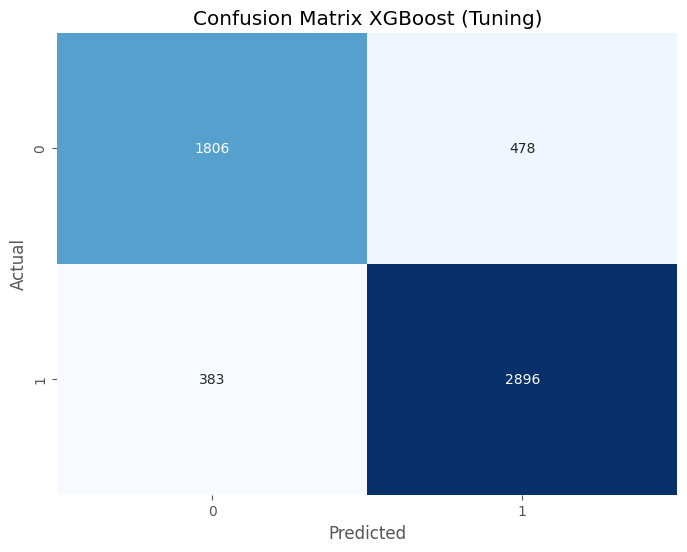

,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,XGBoost(Tuning),0.85,0.85,0.86,0.86,0.89,0.88,0.88,0.87,0.84,0.84


In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Parameter grid untuk XGBoost
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Inisialisasi XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)

# Parameter terbaik
best_params_XG = random_search.best_params_
print(f"Best parameters: {best_params_XG}")

# Model dengan parameter terbaik
model_tuning_XG = random_search.best_estimator_
model_tuning_XG.fit(X_train, y_train)

# Prediksi
y_pred_test = model_tuning_XG.predict(X_test)
y_pred_train = model_tuning_XG.predict(X_train)

# Evaluasi train
acc_train = round(accuracy_score(y_train, y_pred_train), 2)
prec_train = round(precision_score(y_train, y_pred_train), 2)
rec_train = round(recall_score(y_train, y_pred_train), 2)
f1_train = round(f1_score(y_train, y_pred_train), 2)
roc_train = round(roc_auc_score(y_train, y_pred_train), 2)

# Evaluasi test
acc_test = round(accuracy_score(y_test, y_pred_test), 2)
prec_test = round(precision_score(y_test, y_pred_test), 2)
rec_test = round(recall_score(y_test, y_pred_test), 2)
f1_test = round(f1_score(y_test, y_pred_test), 2)
roc_test = round(roc_auc_score(y_test, y_pred_test), 2)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix XGBoost (Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hasil akhir
result_tuning = []
result_tuning.append(['XGBoost(Tuning)', acc_train, acc_test, prec_train, prec_test, rec_train, rec_test, f1_train, f1_test, roc_train, roc_test])
result_tuning = pd.DataFrame(result_tuning, columns=['model', 'acc_train', 'acc_test', 'prec_train', 'prec_test', 'rec_train', 'rec_test', 'f1_train', 'f1_test', 'roc_train', 'roc_test'])
result_tuning


In [47]:
from sklearn.model_selection import cross_validate
import numpy as np

# Melakukan cross validation pada model terbaik dari RandomizedSearch
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_results = cross_validate(
    model_tuning_XG,           # Model terbaik hasil tuning
    X_test,                # Data training
    y_test,                # Label training
    cv=5,                   # 5-fold CV
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# Tampilkan hasil rata-rata CV
print("Cross Validation Scores (mean of 5 folds):")
for metric in scoring:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    print(f"{metric}: {mean_score:.2f}")


Cross Validation Scores (mean of 5 folds):
accuracy: 0.85
precision: 0.86
recall: 0.89
f1: 0.87
roc_auc: 0.92


## Logistic Regressio & Hyperparameter Tuning

Best parameters: {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 1000, 'l1_ratio': 0.9, 'C': 0.1}


,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,LogisticRegression(Tuning),0.85,0.85,0.86,0.86,0.89,0.88,0.87,0.87,0.84,0.84


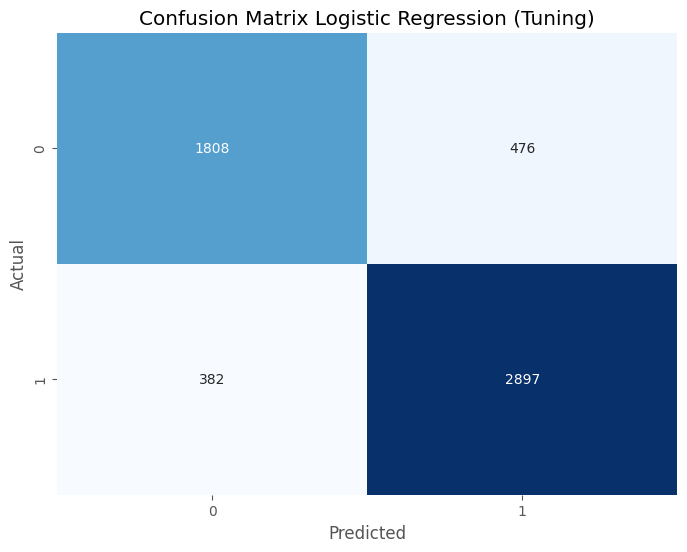

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # liblinear: hanya l1 dan l2
    {
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 200, 500, 1000],
    },
    # lbfgs: hanya l2 dan None
    {
        'penalty': ['l2', None],
        'solver': ['lbfgs'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 200, 500, 1000],
    },
    # saga: bisa l1, l2, elasticnet, None
    {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.5, 0.9],  # hanya dipakai kalau penalty == 'elasticnet'
        'max_iter': [100, 200, 500, 1000],
    },
]

# Initialize Logistic Regression
Logistic = LogisticRegression(random_state=42)

# Initialize GridSearchCV
random_search = RandomizedSearchCV(
    estimator=Logistic,
    param_distributions=param_grid,
    n_iter=10,               # Jumlah iterasi (kombinasi) untuk dicoba
    cv=3,                    # Cross-validation 5 fold
    scoring='roc_auc',       # Metode evaluasi ROC AUC
    n_jobs=-1,               # Paralel untuk mempercepat
    random_state=42          # Seed untuk hasil yang konsisten
)

# Fit the grid search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_LR = random_search.best_params_

print(f"Best parameters: {best_params_LR}")

# Train the model with the best parameters
model_tuning_LR = random_search.best_estimator_
model_tuning_LR.fit(X_train, y_train)

# Evaluate the model (example using roc_auc_score)
result_tuning = []

y_pred_test = model_tuning_LR.predict(X_test)
y_pred_train = model_tuning_LR.predict(X_train)

# data train
acc_train = round(accuracy_score(y_train, y_pred_train),2)
prec_train = round(precision_score(y_train, y_pred_train),2)
rec_train = round(recall_score(y_train, y_pred_train),2)
f1_train = round(f1_score(y_train, y_pred_train),2)
roc_train = round(roc_auc_score(y_train, y_pred_train),2)

# data test
acc_test = round(accuracy_score(y_test, y_pred_test),2)
prec_test = round(precision_score(y_test, y_pred_test),2)
rec_test = round(recall_score(y_test, y_pred_test),2)
f1_test = round(f1_score(y_test, y_pred_test),2)
roc_test = round(roc_auc_score(y_test, y_pred_test),2)

# showing confusion metrics
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Logistic Regression (Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

result_tuning.append(['LogisticRegression(Tuning)', acc_train, acc_test, prec_train, prec_test, rec_train, rec_test, f1_train, f1_test, roc_train, roc_test])
result_tuning = pd.DataFrame(result_tuning, columns=['model', 'acc_train', 'acc_test', 'prec_train', 'prec_test', 'rec_train', 'rec_test', 'f1_train', 'f1_test', 'roc_train', 'roc_test'])
result_tuning

In [49]:
from sklearn.model_selection import cross_validate
import numpy as np

# Melakukan cross validation pada model terbaik dari RandomizedSearch
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_results = cross_validate(
    model_tuning_LR,           # Model terbaik hasil tuning
    X_test,                # Data training
    y_test,                # Label training
    cv=5,                   # 5-fold CV
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# Tampilkan hasil rata-rata CV
print("Cross Validation Scores (mean of 5 folds):")
for metric in scoring:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    print(f"{metric}: {mean_score:.2f}")


Cross Validation Scores (mean of 5 folds):
accuracy: 0.85
precision: 0.85
recall: 0.89
f1: 0.87
roc_auc: 0.92


# Evaluation

Algoritma yang dipilih sebagai model dalam pembuatan machine learning ini adalah `XGBoost`. Pada tahap evaluasi, metrik yang difokuskan adalah ***F1-score*** dan ***ROC-AUC*** score. Pemilihan *F1-score dilakukan karena metrik ini mampu menangani ketidakseimbangan data dengan menyeimbangkan antara presisi dan recall*, sedangkan *ROC-AUC dipilih untuk mengukur kemampuan model dalam membedakan kelas secara keseluruhan, terutama pada kasus klasifikasi biner seperti ini*.

F1-Score: 0.87
ROC-AUC Score: 0.84
Classification Report:
                precision    recall  f1-score   support

Not Depression       0.83      0.79      0.81      2284
    Depression       0.86      0.88      0.87      3279

      accuracy                           0.85      5563
     macro avg       0.84      0.84      0.84      5563
  weighted avg       0.85      0.85      0.85      5563



Text(70.72222222222221, 0.5, 'Actual')

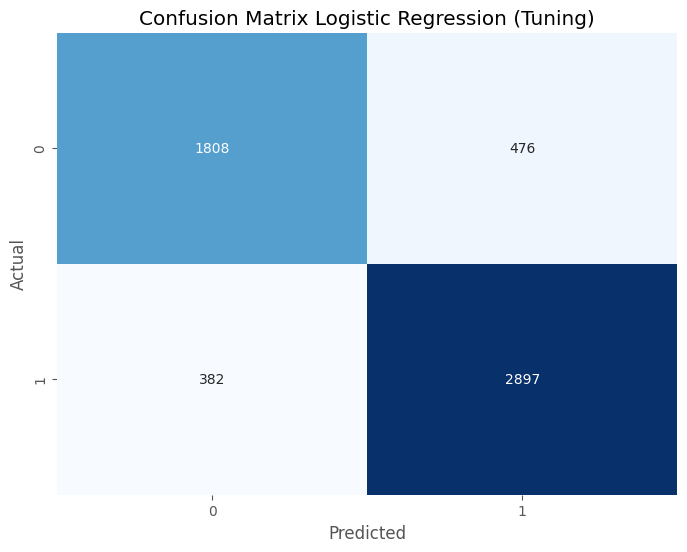

In [58]:
y_pred_test = model_tuning_LR.predict(X_test)
f1_test = round(f1_score(y_test, y_pred_test),2)
roc_test = round(roc_auc_score(y_test, y_pred_test),2)
resume = classification_report(y_test, y_pred_test, target_names=['Not Depression', 'Depression'])

print(f'F1-Score: {f1_test}')
print(f'ROC-AUC Score: {roc_test}')
print(f'Classification Report:\n{resume}')

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Logistic Regression (Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature Importance

 96%|=================== | 5340/5563 [00:14<00:00]       

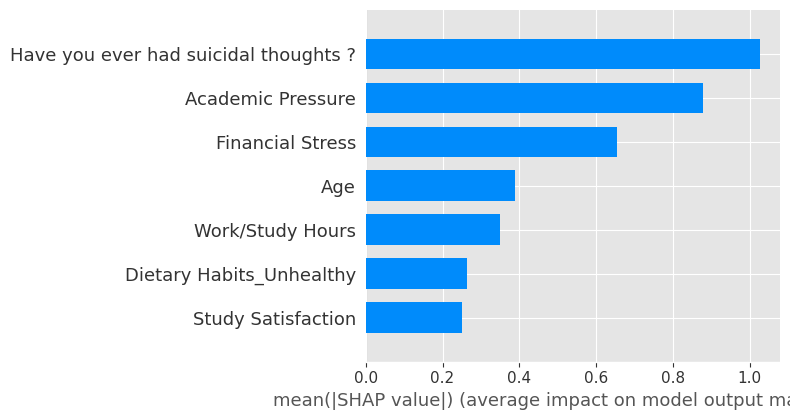

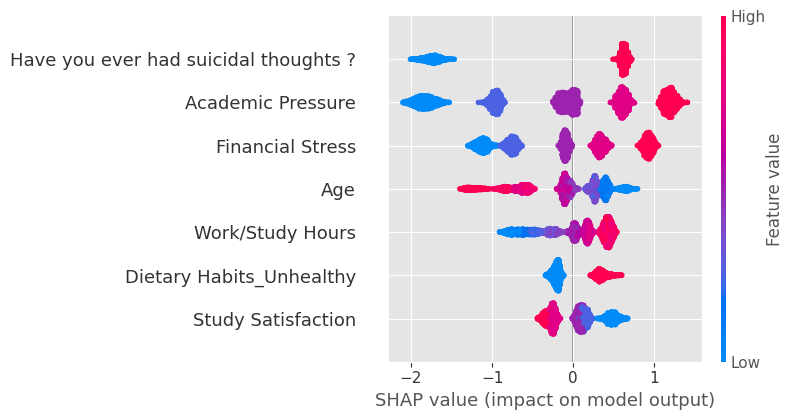

In [50]:
import shap

# Assuming 'model_tuning_XG' is your best XGBoost model
explainer = shap.Explainer(model_tuning_XG, X_train)
shap_values = explainer(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns, max_display=7)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, max_display=7)


**Rekomendasi Strategis:**

- Pikiran Bunuh Diri
Buat sistem deteksi dini dan layanan konseling prioritas.
- Tekanan Akademik
Evaluasi beban studi & adakan pelatihan manajemen stres.
- Stres Finansial
Tawarkan beasiswa, konseling keuangan, dan kerja paruh waktu.
- Usia Muda (Remaja Awal)
Fokus intervensi pada mahasiswa baru dan usia 18–21 tahun.
- Jam Belajar/Bekerja Tinggi
Atur beban studi agar seimbang, dorong waktu istirahat.
- Pola Hidup Tidak Sehat
Menjaga pola hidup sehat dengan mengadakan kegiatan olahraga ditiap minggunya.
- Kepuasan Studi
Tingkatkan kualitas pembelajaran & perhatikan feedback mahasiswa.